<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-08-06 13:16:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-08-06 13:16:59 (196 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [8]:
df["Principal"].unique()

array([1000,  800,  300,  900,  500])

In [9]:
df["Principal"].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

In [10]:
df["Principal"].min()

300

In [11]:
df["Principal"].max()

1000

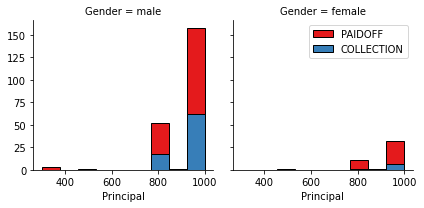

In [12]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
# g.axes[0].legend()
plt.show()

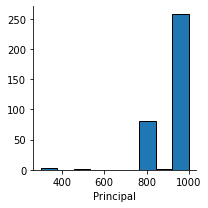

In [13]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
plt.show()

In [14]:
df["Principal"].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

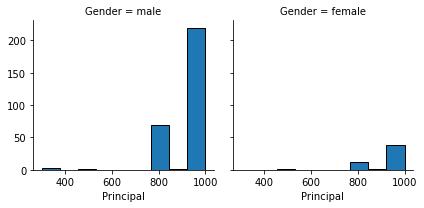

In [15]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender")
g.map(plt.hist, 'Principal', bins=bins, ec="k")

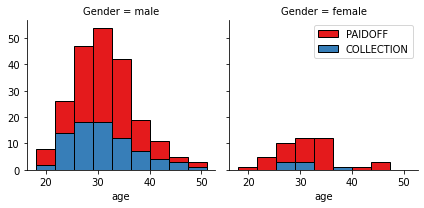

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [17]:
# df[df["Gender"]=='male']

In [18]:
# df[df["loan_status"]=='PAIDOFF']

In [19]:
df[(df["Gender"]=='male') &  (df["loan_status"]=='PAIDOFF')].count()

Unnamed: 0        215
Unnamed: 0.1      215
loan_status       215
Principal         215
terms             215
effective_date    215
due_date          215
age               215
education         215
Gender            215
dtype: int64

In [20]:
df[(df["Gender"]=='female') &  (df["loan_status"]=='PAIDOFF')].count()

Unnamed: 0        45
Unnamed: 0.1      45
loan_status       45
Principal         45
terms             45
effective_date    45
due_date          45
age               45
education         45
Gender            45
dtype: int64

In [21]:
df[(df["Gender"]=='male') &  (df["loan_status"]=='COLLECTION')].count()

Unnamed: 0        79
Unnamed: 0.1      79
loan_status       79
Principal         79
terms             79
effective_date    79
due_date          79
age               79
education         79
Gender            79
dtype: int64

In [22]:
df[(df["Gender"]=='female') &  (df["loan_status"]=='COLLECTION')].count()

Unnamed: 0        7
Unnamed: 0.1      7
loan_status       7
Principal         7
terms             7
effective_date    7
due_date          7
age               7
education         7
Gender            7
dtype: int64

In [23]:
((df["Gender"]=='female') &  (df["loan_status"]=='COLLECTION')).sum()

7

In [24]:
print("male PAIDOFF % is: ",(215/(215+79))*100)

male PAIDOFF % is:  73.12925170068027


In [25]:
print("female PAIDOFF % is: ",(45/(45+7))*100)

female PAIDOFF % is:  86.53846153846155


# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [26]:
#df.head()

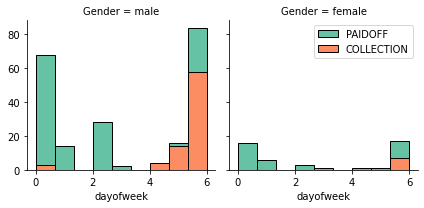

In [27]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [28]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3


### We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [29]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [30]:
df.groupby(["Gender"]).count()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,dayofweek,weekend
Gender,,,,,,,,,,,
female,52,52,52,52,52,52,52,52,52,52,52
male,294,294,294,294,294,294,294,294,294,294,294


In [31]:
df.groupby(['Gender'])['loan_status'].count()

Gender
female     52
male      294
Name: loan_status, dtype: int64

In [32]:
df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [33]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [34]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [35]:
# 0-male
# 1-female

## One Hot Encoding

#### How about education?


In [36]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [37]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender', 'dayofweek',
       'weekend'],
      dtype='object')

In [38]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0


In [39]:
df[['Principal','terms','age','Gender','education']].head()
# "weekend" is also an important feature

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [40]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [41]:
Feature["Master or Above"].value_counts()

0    344
1      2
Name: Master or Above, dtype: int64

### Here, it is clear that only 2 rows(samples) have "Master or Above"
### so, this feature should be ignored.

In [42]:
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [43]:
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

### Feature Selection


Let's define feature sets, X:


In [44]:
X = Feature.values
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]])

What are our lables?


In [45]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [46]:
# 0 - PAIDOFF
# 1- COLLECTION

In [47]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0


In [48]:
df["loan_status"].value_counts()

0    260
1     86
Name: loan_status, dtype: int64

In [49]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [50]:
type(X)

numpy.ndarray

In [51]:
type(y)

numpy.ndarray

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [54]:
# Normmalization
sc = preprocessing.StandardScaler()
X_trainset = sc.fit_transform(X_trainset)
X_testset = sc.transform(X_testset)

In [55]:
print(X_trainset.shape)
print(y_trainset.shape)

(276, 8)
(276,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=4)

In [58]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [59]:
y_testset[0:5]

array([0, 0, 1, 1, 0])

Accuracy Evaluation

In [60]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.8369565217391305
Test set Accuracy:  0.6285714285714286


In [61]:
k_range = list(range(1,10))

In [62]:
from sklearn.metrics import accuracy_score
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_trainset,y_trainset)
    y_pred_knn = model_knn.predict(X_testset)
    acc = accuracy_score(y_testset, y_pred_knn)
    print(f"k:{k}, accuracy: {acc}")

k:1, accuracy: 0.6142857142857143
k:2, accuracy: 0.6571428571428571
k:3, accuracy: 0.6571428571428571
k:4, accuracy: 0.6285714285714286
k:5, accuracy: 0.6142857142857143
k:6, accuracy: 0.6571428571428571
k:7, accuracy: 0.6571428571428571
k:8, accuracy: 0.6428571428571429
k:9, accuracy: 0.6571428571428571


Here, K=3(odd) gives better accuracy

In [63]:
final_model_knn = KNeighborsClassifier(n_neighbors=3)

In [64]:
final_model_knn.fit(X_trainset, y_trainset)
y_pred_knn = final_model_knn.predict(X_testset)
accuracy_score(y_testset, y_pred_knn)

0.6571428571428571

# Decision Tree


### Setting up Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
print(X.shape)
print(y.shape)

(346, 8)
(346,)


In [67]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of y training set {}'.format(y_trainset.shape))

Shape of X training set (276, 8) &  Size of y training set (276,)


In [68]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of y testing set {}'.format(y_testset.shape))

Shape of X testing set (70, 8) &  Size of y testing set (70,)


### Modelling

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [69]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [70]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [71]:
predTree = drugTree.predict(X_testset)

In [72]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6


##### Optimize the parameter

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {"max_depth": [2,3,4,5,6,7,8],
             "min_samples_split": [20,15,10,5,3,2],
             "min_samples_leaf": [15,10,8,6,4,2]}

# it  automatically create validation data-set
# no need to create validation set

model = DecisionTreeClassifier()

clf = GridSearchCV(model, param_grid)

clf.fit(X_trainset, y_trainset)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [15, 10, 8, 6, 4, 2],
                         'min_samples_split': [20, 15, 10, 5, 3, 2]})

In [75]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=15, min_samples_split=20)

In [76]:
final_model_tree = DecisionTreeClassifier(max_depth = 2,
                                    min_samples_split=15,
                                    min_samples_leaf=20)
final_model_tree.fit(X_trainset, y_trainset)
y_pred_tree = final_model_tree.predict(X_testset)

from sklearn.metrics import accuracy_score

accuracy_score(y_testset, y_pred_tree)

0.6714285714285714

Clf is an estimator instance, which is used to store model. We use clf to store trained model values, which are further used to predict value, based on the previously stored weights.

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_testset, y_pred_tree)

array([[47,  0],
       [23,  0]])

<AxesSubplot:>

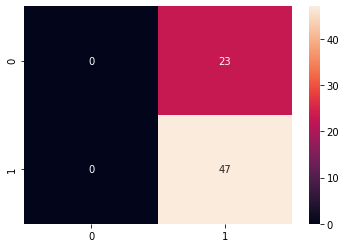

In [79]:
cm = confusion_matrix(y_testset, y_pred_tree, labels=[1,0])
import seaborn as sns
sns.heatmap(cm, annot=True )

In [80]:
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [81]:
y_testset

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0])

### Plotting Tree

In [82]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[4] <= -0.154\ngini = 0.352\nsamples = 276\nvalue = [213, 63]'),
 Text(83.7, 108.72, 'X[7] <= 0.139\ngini = 0.034\nsamples = 117\nvalue = [115, 2]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(251.10000000000002, 108.72, 'X[7] <= 0.139\ngini = 0.473\nsamples = 159\nvalue = [98, 61]'),
 Text(209.25, 36.23999999999998, 'gini = 0.496\nsamples = 86\nvalue = [47, 39]'),
 Text(292.95, 36.23999999999998, 'gini = 0.421\nsamples = 73\nvalue = [51, 22]')]

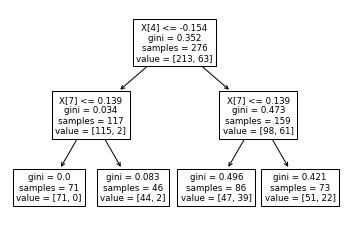

In [83]:
plot_tree(final_model_tree)

# Support Vector Machine


In [84]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_trainset, y_trainset) 

SVC()

In [85]:
y_pred_svm = clf_svm.predict(X_testset)
y_pred_svm [0:5]

array([0, 0, 0, 0, 0])

In [86]:
accuracy_score(y_testset, y_pred_svm)

0.6714285714285714

In [87]:
confusion_matrix(y_testset, y_pred_svm, labels=[1,0])


array([[ 0, 23],
       [ 0, 47]])

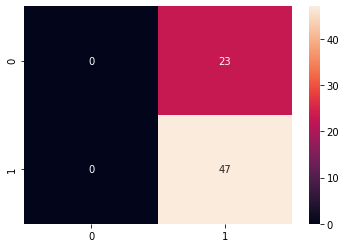

In [88]:
cm = confusion_matrix(y_testset, y_pred_svm, labels=[1,0])
#import seaborn as sns
sns.heatmap(cm, annot=True )
plt.show()

# Logistic Regression


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
 model_log_reg = LogisticRegression()

In [91]:
model_log_reg.fit(X_trainset, y_trainset)

LogisticRegression()

In [92]:
y_pred_log_reg = model_log_reg.predict(X_testset)

In [93]:
y_pred_log_reg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [94]:
from sklearn.metrics import accuracy_score


In [95]:
accuracy_score(y_testset, y_pred_log_reg)

0.6714285714285714

In [96]:
model_log_reg.intercept_

array([-1.90310766])

In [97]:
y_pred_log_reg_prob = model_log_reg.predict_proba(X_testset)

<AxesSubplot:>

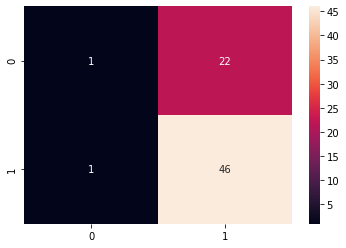

In [98]:
cm = confusion_matrix(y_testset, y_pred_log_reg, labels=[1,0])
import seaborn as sns
sns.heatmap(cm, annot=True )

# Model Evaluation using Test set


In [99]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [100]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-08-06 13:17:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-08-06 13:17:17 (121 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [101]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [102]:
test_df["loan_status"].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [103]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [104]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [105]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [106]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [107]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [108]:
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [109]:
test_Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [110]:
X_test_set = test_Feature.values

In [111]:
#X_test_set

In [112]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [113]:
#test_df['loan_status']

In [114]:
# 0 - PAIDOFF
# 1 - COLLECTION

In [115]:
y_test_set = test_df['loan_status'].values
y_test_set[0:5]

array([0, 0, 0, 0, 0])

## Jaccard index

### Logistic Regression

In [116]:
jaccard_score(y_test_set, model_log_reg.predict(X_test_set), pos_label=0)

0.0

In [117]:
y_test_set

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [118]:
model_log_reg.predict(X_test_set)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [119]:
jaccard_score(y_test_set, model_log_reg.predict(X_test_set), pos_label=1)

0.25925925925925924

### Decision Tree

In [120]:
final_model_tree.predict(X_test_set)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
jaccard_score(y_test_set, final_model_tree.predict(X_test_set), pos_label=1)

0.0

In [122]:
jaccard_score(y_test_set, final_model_tree.predict(X_test_set), pos_label=0)

0.7407407407407407

### KNN

In [123]:
final_model_knn.predict(X_test_set)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
jaccard_score(y_test_set, final_model_knn.predict(X_test_set), pos_label=1)

0.0

In [125]:
jaccard_score(y_test_set, final_model_knn.predict(X_test_set), pos_label=0)

0.6111111111111112

### SVM

In [126]:
clf_svm.predict(X_test_set)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
jaccard_score(y_test_set, clf_svm.predict(X_test_set), pos_label=1)

0.0

In [128]:
jaccard_score(y_test_set, clf_svm.predict(X_test_set), pos_label=0)

0.7407407407407407

## logg loss

### Logistic Regression

In [129]:
yhat_prob =  model_log_reg.predict_proba(X_test_set)

In [130]:
log_loss(y_test_set, yhat_prob)

25.31079280670825

## F1 Score

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

### Logistic Regression

In [132]:
confusion_matrix(y_test_set, model_log_reg.predict(X_test_set), labels=[1,0])

array([[14,  0],
       [40,  0]])

In [133]:
classification_report(y_test_set, model_log_reg.predict(X_test_set), labels=[1,0], zero_division=0)

'              precision    recall  f1-score   support\n\n           1       0.26      1.00      0.41        14\n           0       0.00      0.00      0.00        40\n\n    accuracy                           0.26        54\n   macro avg       0.13      0.50      0.21        54\nweighted avg       0.07      0.26      0.11        54\n'

In [134]:
f1_score(y_test_set, model_log_reg.predict(X_test_set), average=None)

array([0.        , 0.41176471])

### Decision Tree

In [135]:
classification_report(y_test_set, final_model_tree.predict(X_test_set), labels=[1,0], zero_division=0 )

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        14\n           0       0.74      1.00      0.85        40\n\n    accuracy                           0.74        54\n   macro avg       0.37      0.50      0.43        54\nweighted avg       0.55      0.74      0.63        54\n'

In [136]:
f1_score(y_test_set, final_model_tree.predict(X_test_set), average='micro')

0.7407407407407407

### KNN

In [137]:
classification_report(y_test_set, final_model_knn.predict(X_test_set), labels=[1,0])

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        14\n           0       0.70      0.82      0.76        40\n\n    accuracy                           0.61        54\n   macro avg       0.35      0.41      0.38        54\nweighted avg       0.52      0.61      0.56        54\n'

In [138]:
f1_score(y_test_set, final_model_tree.predict(X_test_set), average='micro')

0.7407407407407407

## SVM

In [139]:
classification_report(y_test_set, clf_svm.predict(X_test_set), labels=np.unique(y_test_set),zero_division=0)

'              precision    recall  f1-score   support\n\n           0       0.74      1.00      0.85        40\n           1       0.00      0.00      0.00        14\n\n    accuracy                           0.74        54\n   macro avg       0.37      0.50      0.43        54\nweighted avg       0.55      0.74      0.63        54\n'

In [140]:
f1_score(y_test_set, clf_svm.predict(X_test_set), average='micro')

0.7407407407407407

In [141]:
f1_score(y_test_set, clf_svm.predict(X_test_set), average='macro')

0.425531914893617

In [142]:
f1_score(y_test_set, clf_svm.predict(X_test_set), average=None)

array([0.85106383, 0.        ])

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.61       | 0.74        | NA      |
| Decision Tree      | 0.74       | 0.74       | NA      |
| SVM                | 0.74       | 0.74        | NA      |
| LogisticRegression | 0.26       | 0.41        | 25.31       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
